In [91]:
#필요한 함수들 호출
import urllib.request
import time
import pandas as pd
pd.set_option('display.max_columns', None)
import json

In [92]:
#필요한 변수들
api_key = '9e634d84-d6e6-46a8-b998-eb90686ce6e1'
id ='1459'
url = f'http://www.kamis.or.kr/service/price/xml.do?action=monthlySalesList&p_yyyy=2020&p_period=40&p_itemcategorycode=100&p_itemcode=111&p_kindcode=01&p_graderank=2&p_countycode=1101&p_convert_kg_yn=N&p_cert_key={api_key}&p_cert_id={id}&p_returntype=json'

In [93]:


html = urllib.request.urlopen(url).read()
data = json.loads(html)
price = data['price']['item']
df = pd.DataFrame.from_dict(price, orient='columns')
df.rename(columns={'yearavg':'avg'}, inplace=True)
df = df.transpose()
df1 = df.rename(columns=df.iloc[0])
df = df1.drop(df1.index[0]).replace(',','', regex=True).apply(pd.to_numeric)
name = data['price']['caption']

In [94]:
from matplotlib import pyplot as plt

#폰트매니저 호출해주기
from matplotlib import font_manager, rc
font_url = 'C:/Windows/Fonts/SDMISAENG (1).ttf'
font_name = font_manager.FontProperties(fname=font_url).get_name()
plt.rcParams["font.family"] = font_name
rc('font', family=font_name)
plt.rcParams["figure.figsize"] = (14,7)
plt.style.use('ggplot')

year = 1996
last_year = int('2020')
df_show = df.transpose()
df_show

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,avg
1996,33850,33508,33325,34158,35135,34924,34154,34174,34850,35229,34850,34850,34429
1997,34850,34929,35210,35576,35800,35800,36025,37180,36691,35423,34896,34932,35616
1998,35650,35775,35800,35800,35800,36081,36927,38585,38785,38333,38088,38750,37059
1999,38500,38500,39220,39400,39852,40350,40500,40500,40500,40496,40100,40100,39865
2000,41000,41000,41000,41000,41000,41000,41000,41000,41000,41000,40954,40524,40955
2001,40500,40500,40500,40854,41000,41000,41000,41000,40180,38125,38000,38000,40052
2002,38000,38000,38000,38000,38000,38870,39000,39231,41000,39808,40000,40000,38993
2003,40000,40000,40000,40000,40000,40250,41000,41000,41000,41000,42000,42000,40700
2004,42000,42875,43000,43000,42333,42346,43000,43000,42263,40667,38286,38000,41891
2005,38000,38000,38000,38000,38000,38000,38000,38000,37409,36000,35000,35000,37264


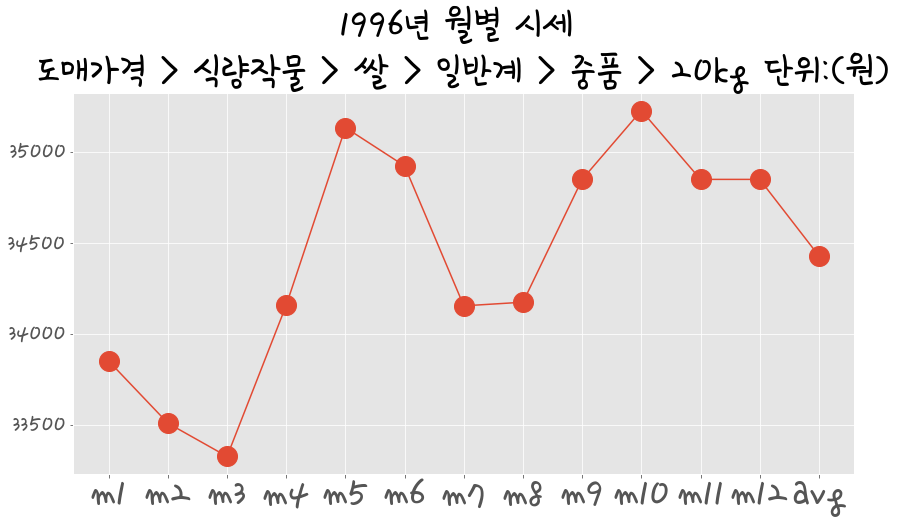

월별가격 입니다. [33850, 33508, 33325, 34158, 35135, 34924, 34154, 34174, 34850, 35229, 34850, 34850, 34429]


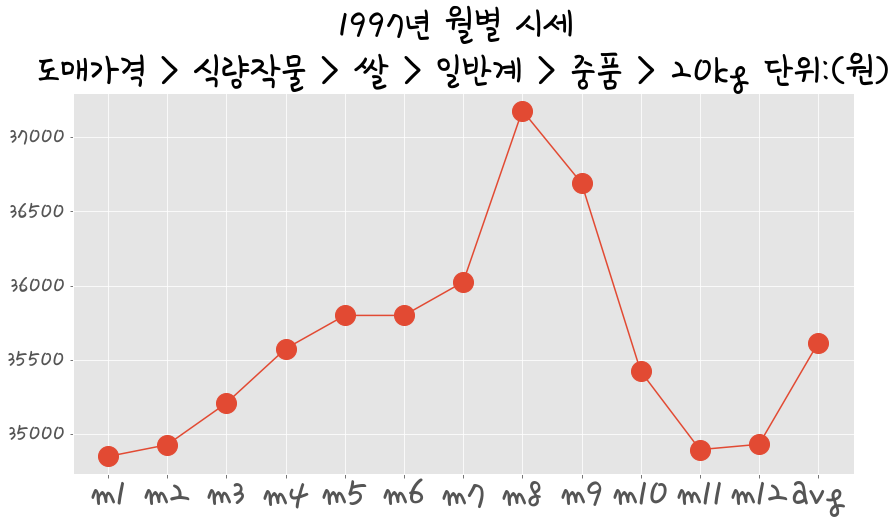

월별가격 입니다. [34850, 34929, 35210, 35576, 35800, 35800, 36025, 37180, 36691, 35423, 34896, 34932, 35616]


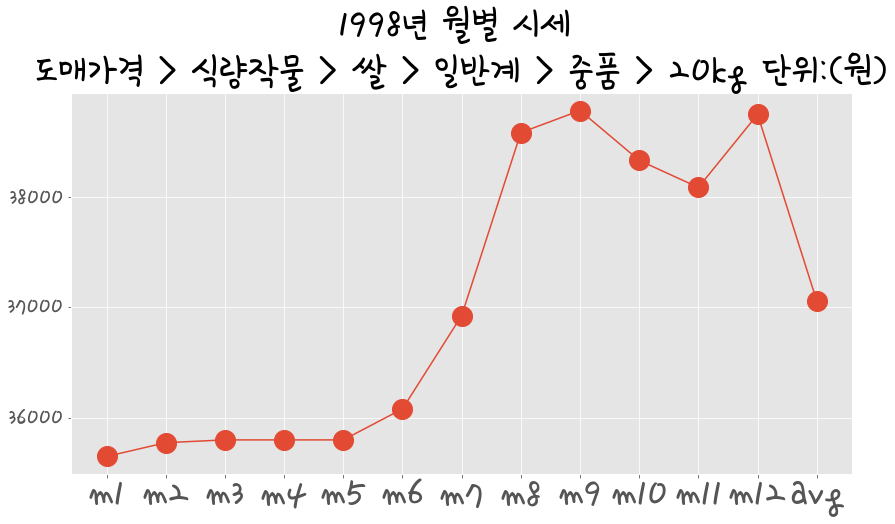

월별가격 입니다. [35650, 35775, 35800, 35800, 35800, 36081, 36927, 38585, 38785, 38333, 38088, 38750, 37059]


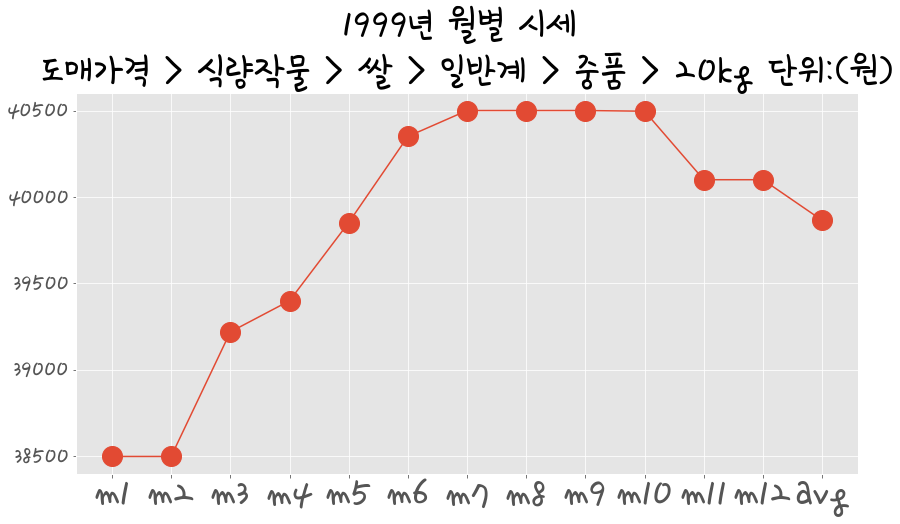

월별가격 입니다. [38500, 38500, 39220, 39400, 39852, 40350, 40500, 40500, 40500, 40496, 40100, 40100, 39865]


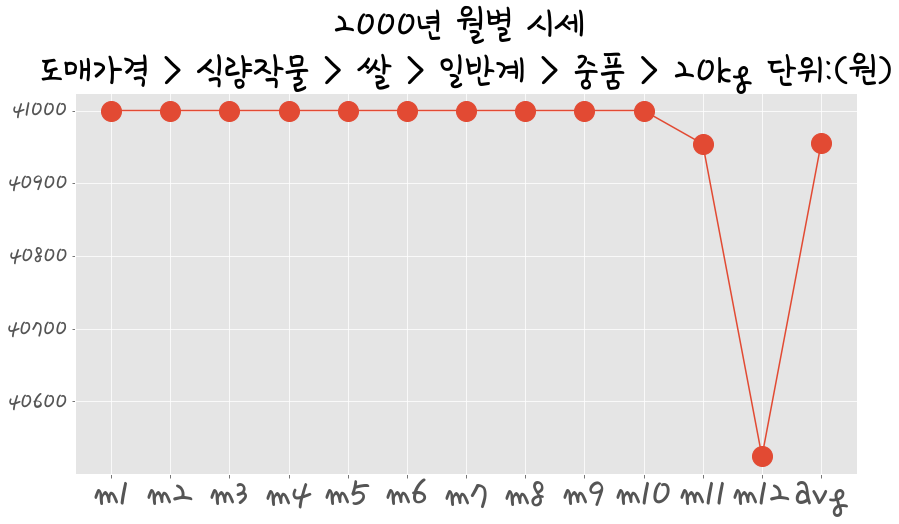

월별가격 입니다. [41000, 41000, 41000, 41000, 41000, 41000, 41000, 41000, 41000, 41000, 40954, 40524, 40955]


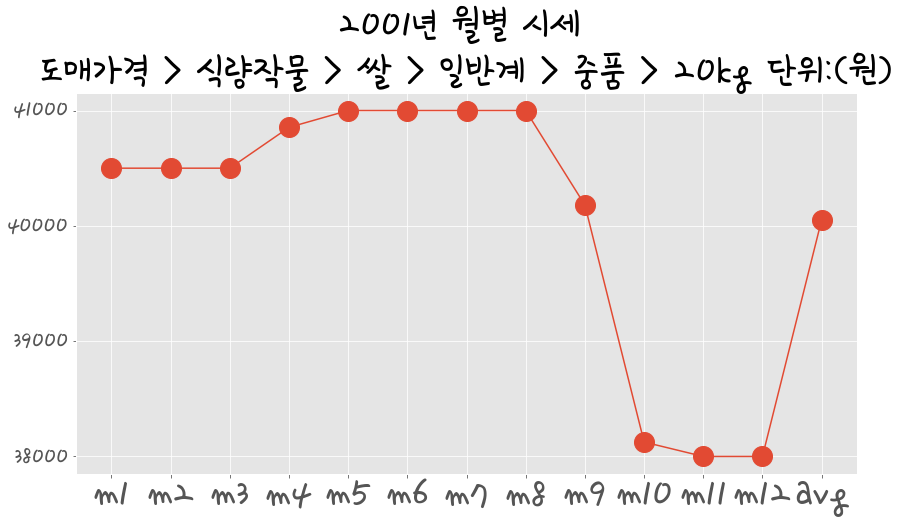

월별가격 입니다. [40500, 40500, 40500, 40854, 41000, 41000, 41000, 41000, 40180, 38125, 38000, 38000, 40052]


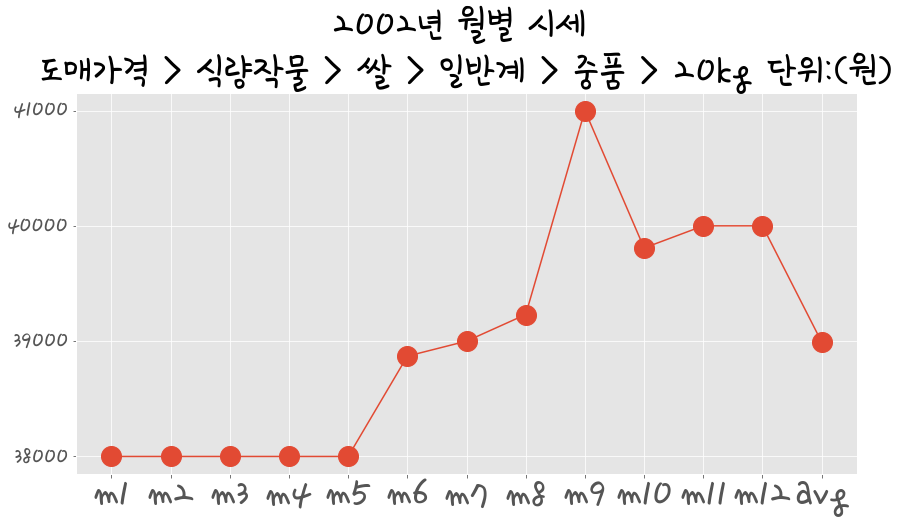

월별가격 입니다. [38000, 38000, 38000, 38000, 38000, 38870, 39000, 39231, 41000, 39808, 40000, 40000, 38993]


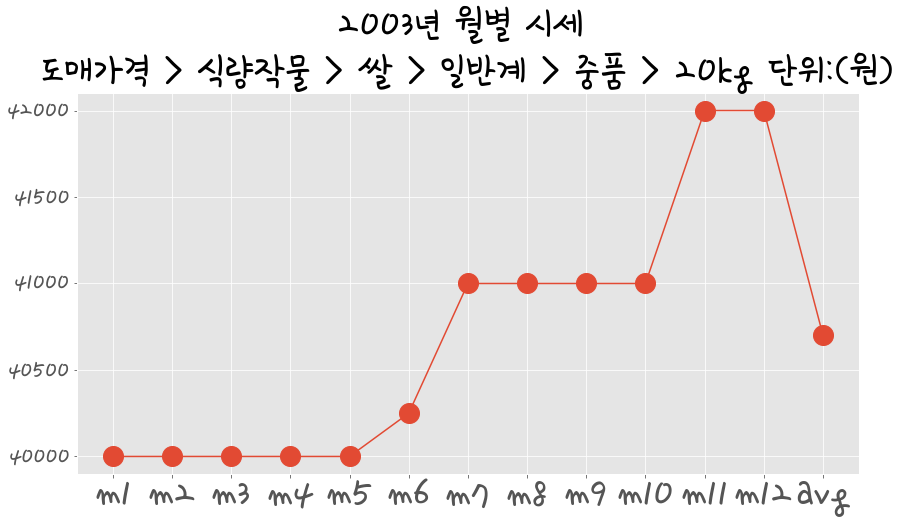

월별가격 입니다. [40000, 40000, 40000, 40000, 40000, 40250, 41000, 41000, 41000, 41000, 42000, 42000, 40700]


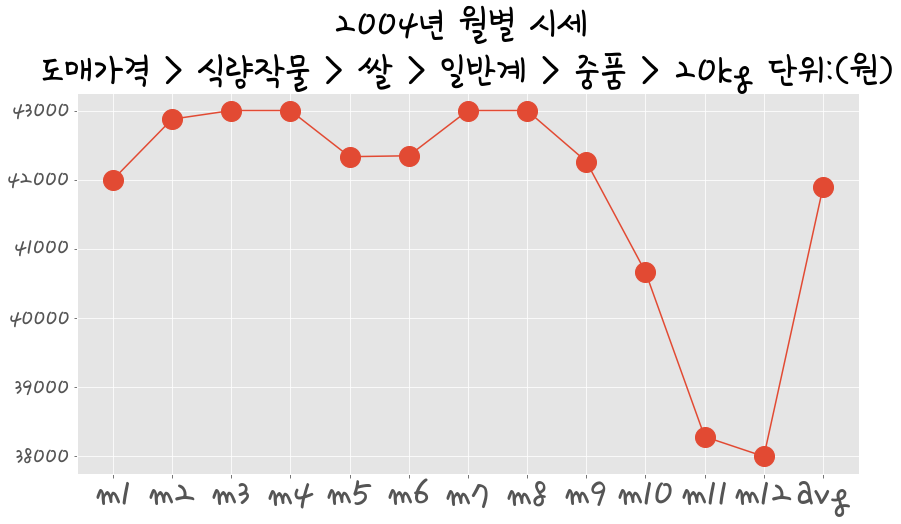

월별가격 입니다. [42000, 42875, 43000, 43000, 42333, 42346, 43000, 43000, 42263, 40667, 38286, 38000, 41891]


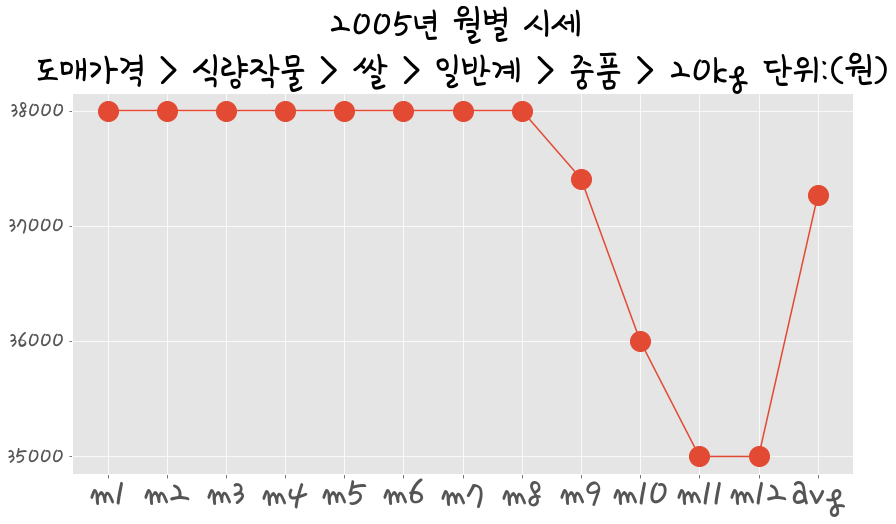

월별가격 입니다. [38000, 38000, 38000, 38000, 38000, 38000, 38000, 38000, 37409, 36000, 35000, 35000, 37264]


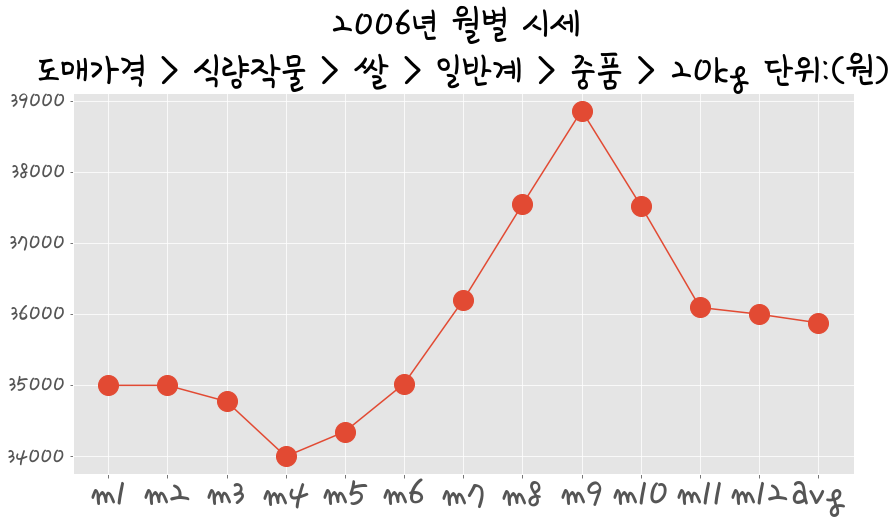

월별가격 입니다. [35000, 35000, 34773, 34000, 34350, 35024, 36200, 37545, 38864, 37526, 36095, 36000, 35878]


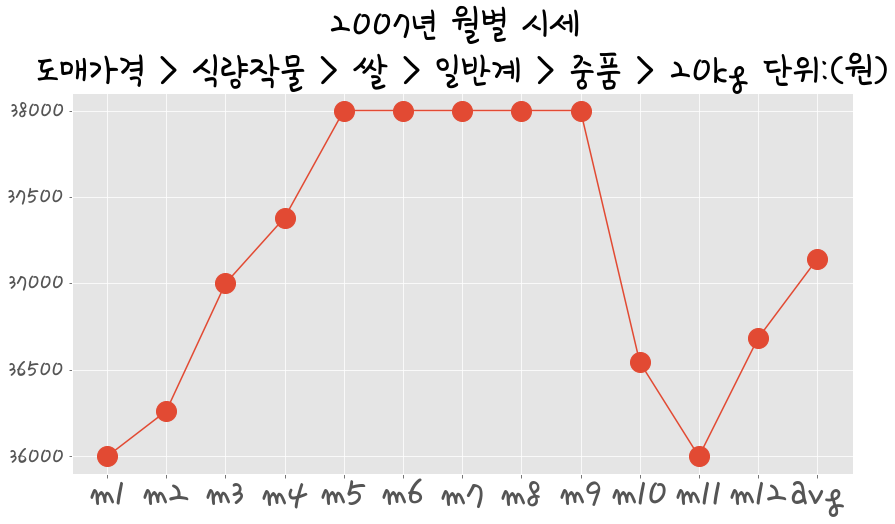

월별가격 입니다. [36000, 36263, 37000, 37381, 38000, 38000, 38000, 38000, 38000, 36545, 36000, 36684, 37142]


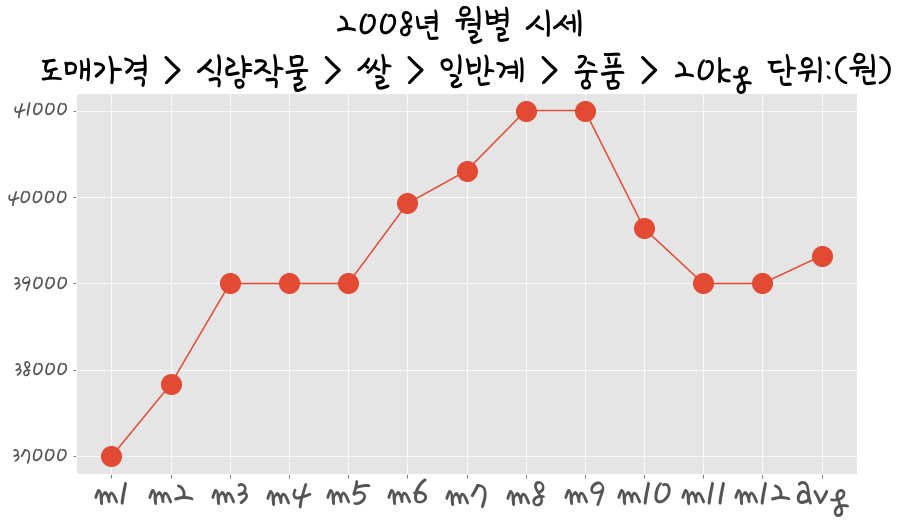

월별가격 입니다. [37000, 37833, 39000, 39000, 39000, 39925, 40304, 41000, 41000, 39636, 39000, 39000, 39321]


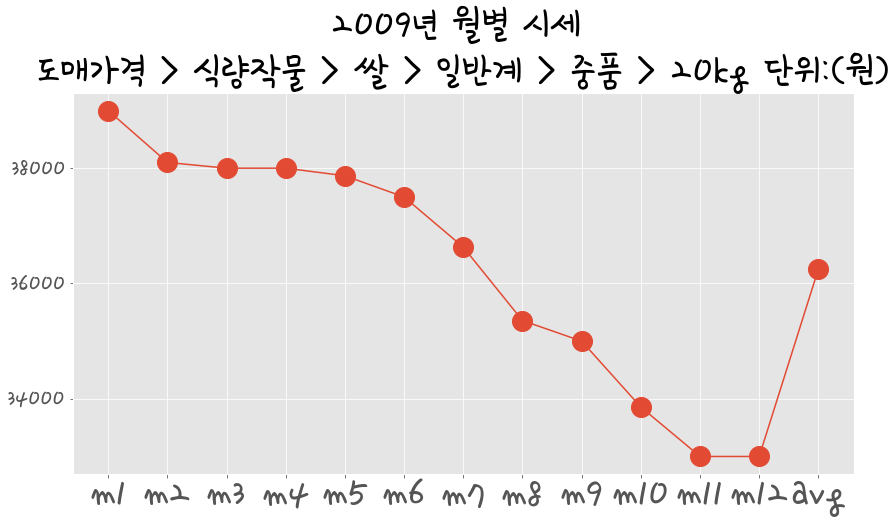

월별가격 입니다. [39000, 38100, 38000, 38000, 37868, 37500, 36630, 35357, 35000, 33857, 33000, 33000, 36251]


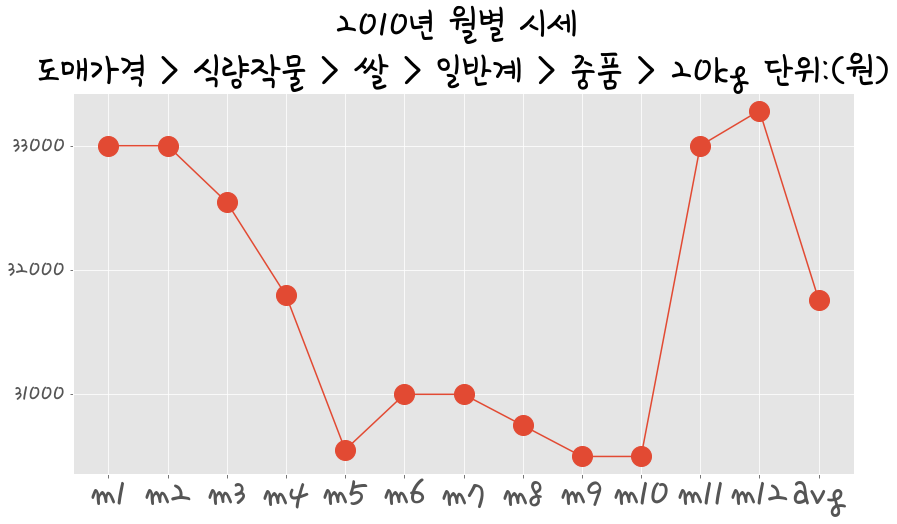

월별가격 입니다. [33000, 33000, 32545, 31795, 30553, 31000, 31000, 30750, 30500, 30500, 33000, 33283, 31762]


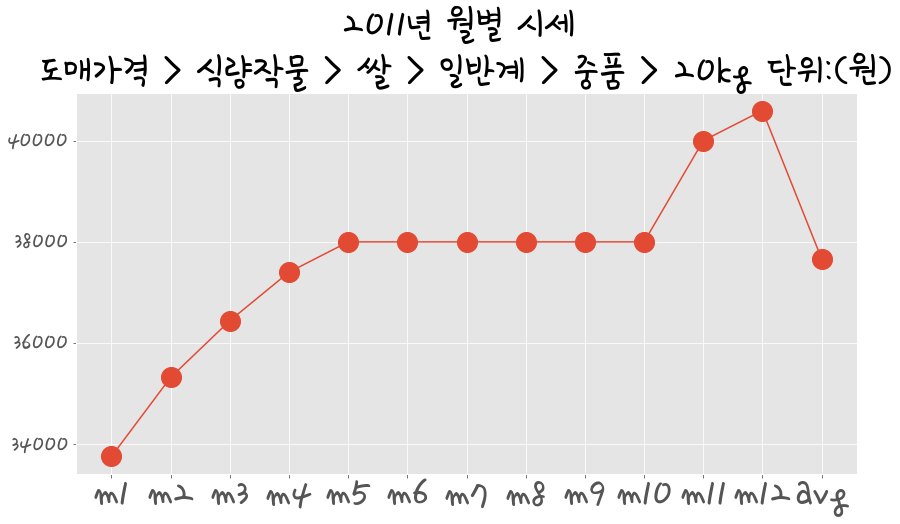

월별가격 입니다. [33762, 35324, 36444, 37402, 38000, 38000, 38000, 38000, 38000, 38000, 40000, 40595, 37666]


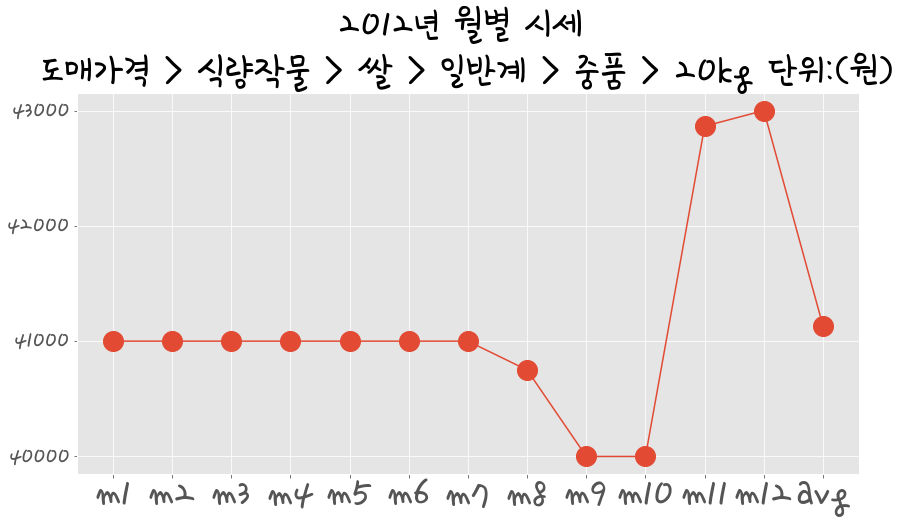

월별가격 입니다. [41000, 41000, 41000, 41000, 41000, 41000, 41000, 40750, 40000, 40000, 42864, 43000, 41131]


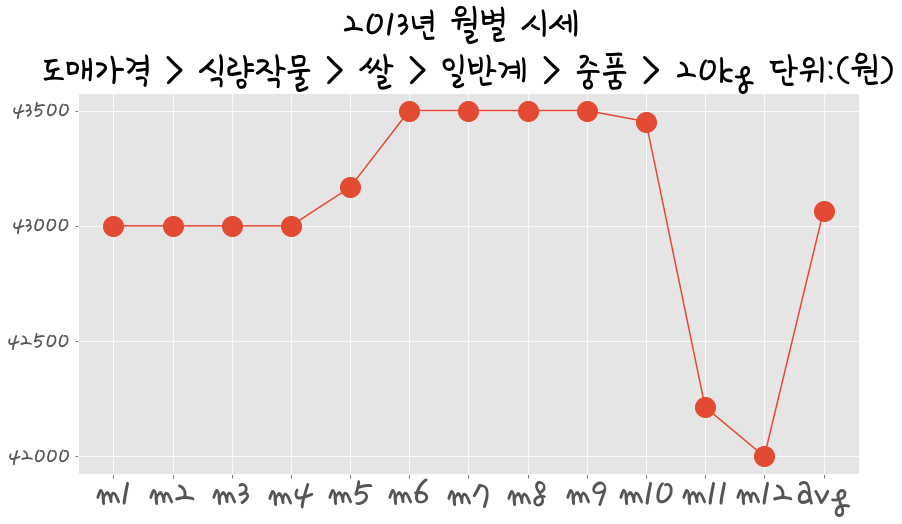

월별가격 입니다. [43000, 43000, 43000, 43000, 43167, 43500, 43500, 43500, 43500, 43452, 42214, 42000, 43065]


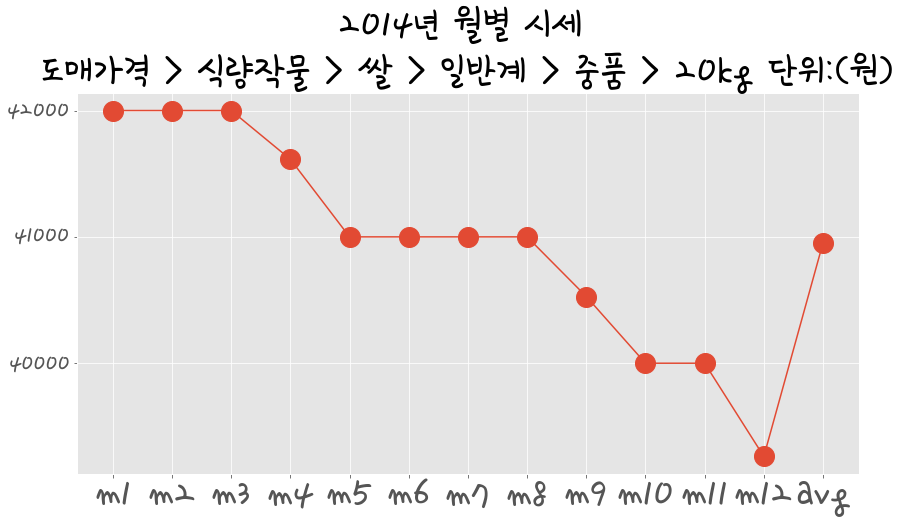

월별가격 입니다. [42000, 42000, 42000, 41614, 41000, 41000, 41000, 41000, 40528, 40000, 40000, 39262, 40953]


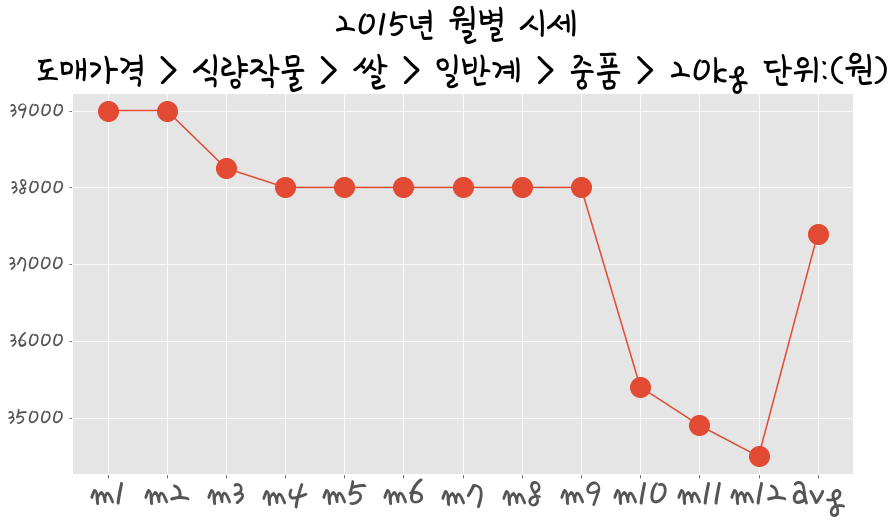

월별가격 입니다. [39000, 39000, 38250, 38000, 38000, 38000, 38000, 38000, 38000, 35405, 34905, 34500, 37397]


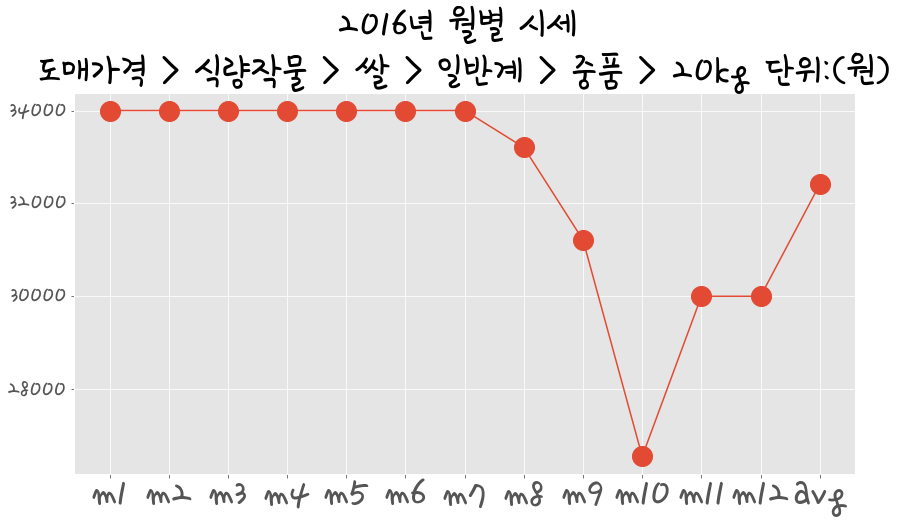

월별가격 입니다. [34000, 34000, 34000, 34000, 34000, 34000, 34000, 33205, 31211, 26550, 30000, 30000, 32409]


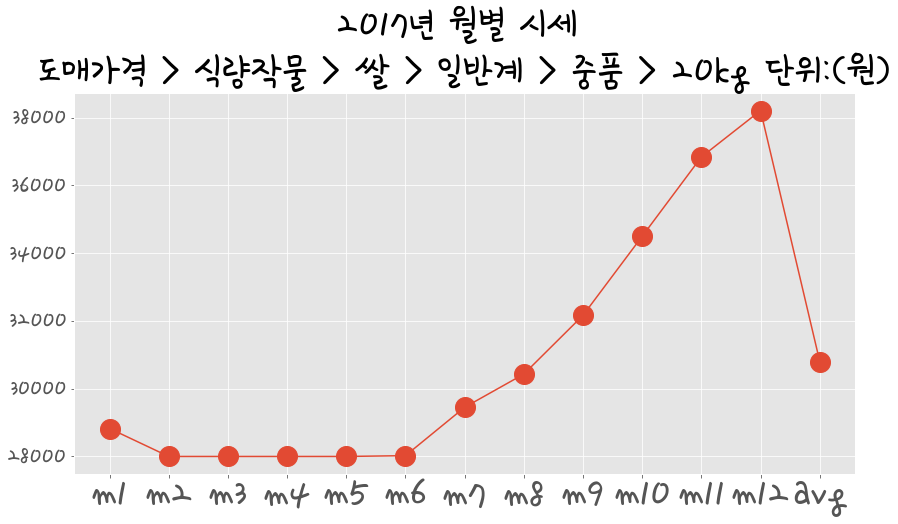

월별가격 입니다. [28825, 28000, 28000, 28000, 28000, 28024, 29452, 30432, 32167, 34500, 36841, 38211, 30802]


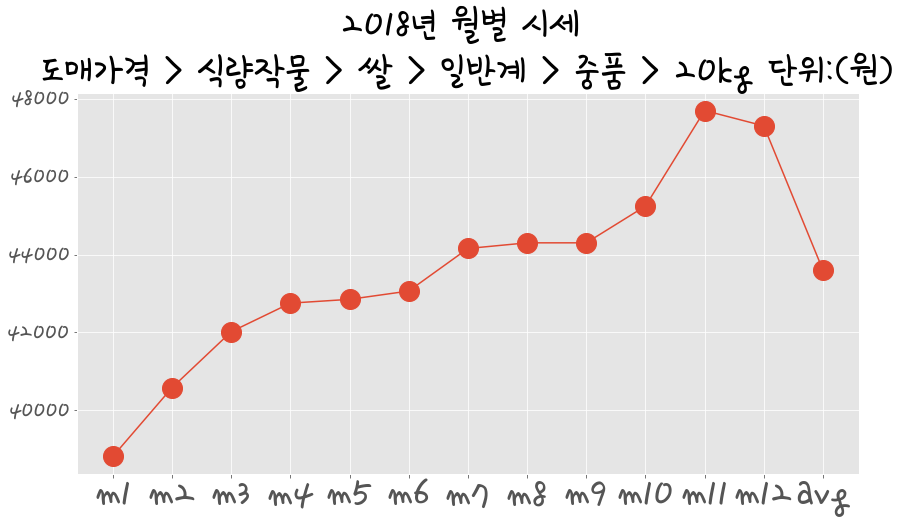

월별가격 입니다. [38818, 40583, 42019, 42752, 42850, 43063, 44155, 44300, 44300, 45243, 47695, 47300, 43595]


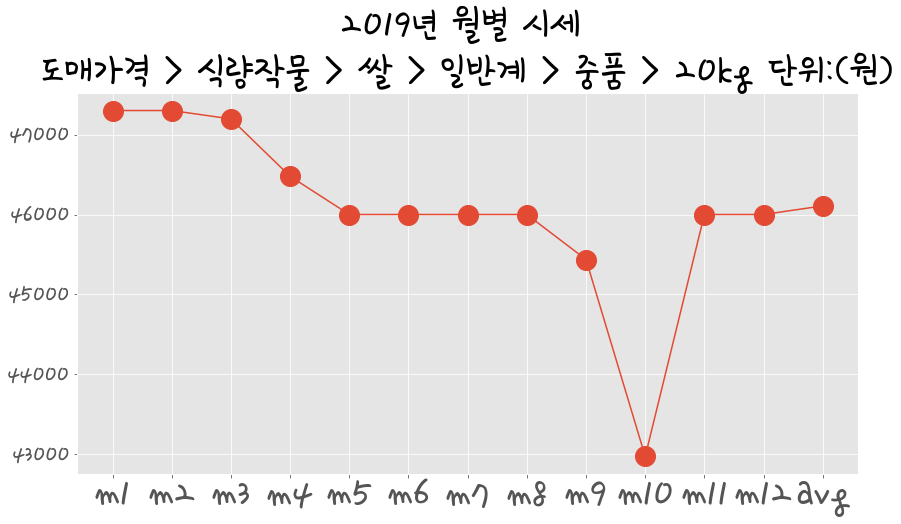

월별가격 입니다. [47300, 47300, 47195, 46477, 46000, 46000, 46000, 46000, 45437, 42975, 46000, 46000, 46108]


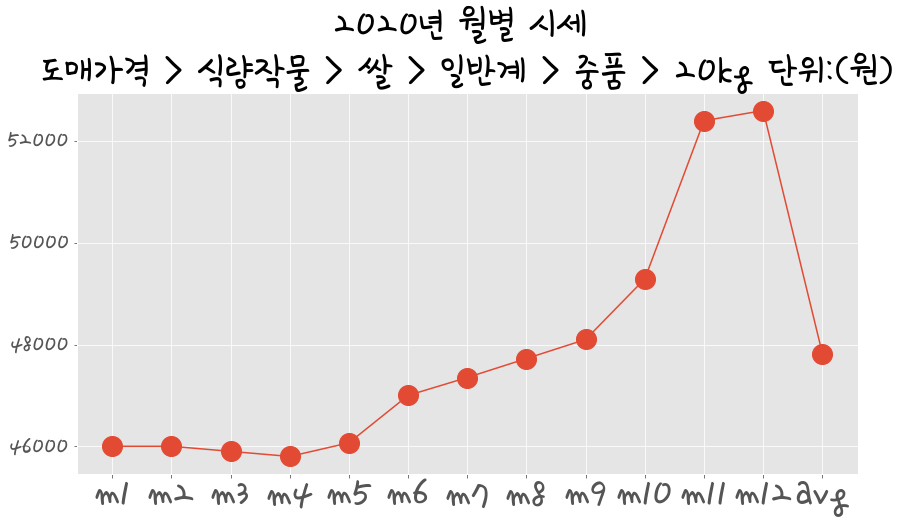

월별가격 입니다. [46000, 46000, 45900, 45800, 46068, 47000, 47352, 47725, 48100, 49292, 52400, 52600, 47823]


In [95]:
while year < last_year + 1:
    x = df[f'{year}']
    plt.plot(x, marker='o', markersize=20)
    plt.title(f'{year}년 월별 시세 \n{name} 단위:(원)' , fontsize=50)
    plt.show()
    month_price = df[f'{year}'].to_list()
    print('월별가격 입니다.', month_price)
    year += 1
    time.sleep(1)